## Question 1

In [202]:
class HashTable:
    '''
    This hash table stores nodes in hash data structure. 
    '''
    def __init__(self, m, k):
        """
        input: 
            -m: modulo
            -k: substring length
        """
        self.m = prime(int(1.2*m))
        #initializes an empty hash table with self.m number of slots
        self.hash_table = [None for _ in range(self.m)]
        self.q = self.m
        self.k = k
        self.base = 7
        
         
    def hash_function(self, key):
        '''
        input:
            -key: hash value
        
        Output:
            -hash key: index of the node in hash table
        '''
        return key % self.m
    
    def to_int(self, string):
        '''
        input:
            -string: str
        output:
            -ascii value with weight (multiplies base 
             with different powers to each letters depending
             on their positions.)
        '''
        total = 0
        len_str = len(string)
        for i in string:
            total += ord(i)*self.base**(len_str-1)
            len_str -= 1
        return total

    def to_hash(self, string):
        """
        
        """
        num = self.to_int(string)
        return num % self.q
    
    def prime(n, factor = None):
        '''
        input:
            -n: int
        output: 
            -smallest prime number bigger than n
        '''
        np=[]
        isprime=[]
        for i in range (n+1,n+200):
            np.append(i)
        for j in np:
            val_is_prime = True
            for x in range(2,j-1):
                if j % x == 0:
                    val_is_prime = False
                    break
            if val_is_prime:
                isprime.append(j)
        return min(isprime)


    def create_table(self, wordbank):
        """
        Creates a hash table using rolling hashing. 
        It inserts the hash value, i (the starting index), and substring
        into the table 
        input:
            -wordbank: str
        output:
            -None
        """
        for i in range(len(wordbank)-self.k+1):
            substring = wordbank[i:i+self.k]
            if i == 0:
                hash_value = self.to_hash(substring)
                self.chained_hash_insert(hash_value, i, substring)

            else:
                #rolling hashing
                hash_value = (((hash_value - ord(wordbank[i-1])*self.base**(self.k-1) % self.q)*self.base) % self.q + ord(wordbank[i+self.k-1])) % self.q
                self.chained_hash_insert(hash_value, i, substring)
    
    def chained_hash_insert(self, key, value, substring):
        """
        Input:
            -key: hash value
            -value: starting index of a substring
            -substring: str, substring
        """
        #create the node to store our key and value
        node = HashTableNode(key, value, substring)
        #find the hashed key for the table
        hashed_key = self.hash_function(key)

        if self.hash_table[hashed_key] is not None:
            #if there already exists another node, add the current node on top
            node.nextNode = self.hash_table[hashed_key]
        self.hash_table[hashed_key] = node
        
        
    def chained_hash_search(self, key, substring):
        '''
        input: 
            -key: hash value
            -substring: str, letters with length k.
        output:
            -lst: a list of list with a common node's value and substring
                -value: int, starting index of the common word
                -
        '''
        #find the key after hashing
        hashed_key = self.hash_function(key)
        #start traversing from this node
        cur = self.hash_table[hashed_key]
        lst=[]
        
        #traversing the list to find the value
        while cur is not None:
            if cur.key == key:
                if cur.substring == substring:
                    lst.append([cur.value,cur.substring])
            cur = cur.nextNode
        if len(lst)!=0:
            return lst
        else: 
            return False
    
    def chained_hash_delete(self, key, value):
        hashed_key = self.hash_function(key)
        prev = None
        cur = self.hash_table[hashed_key]
        while cur is not None:
            if cur.key == key:
        #if the value is not at the top of the linked list
        #update the previous node's value to be the node's next node
                if prev is not None:
                    prev.nextNode = cur.nextNode
        #if the value is at the top of the linked list
        #we simply need to update the top to be the next node
                else:
                    self.hash_table[hashed_key] = cur.nextNode
                return
            prev = cur
            cur = cur.nextNode
        raise Exception("Key-value pair not found!")
    
    
class HashTableNode:
    '''
    This hash table node stores the key and value pairs.
    Additionally, it stores substring, and it has the attribute next and prev
    for us to traverse the linked list and go to the
    next node or previous node, respectively.
    '''
    def __init__(self, key, value, substring, nextNode = None, prev = None):
        self.key = key
        self.value = value
        self.substring = substring  
        self.nextNode = nextNode
        self.prev = prev
        
    def __str__(self):
        return f'{self.key}, {self.value}'



In [200]:
def rh_get_match(x,y,k):
    """
    Finds all common length-k substrings of x and y 
    using rolling hashing on both strings.
    
    Input:
        -x,y: strings
        -k: int, length of substring
    
    Output: 
        - A list of tuples (i,j) where x[i:i+k]= y[j:j+k]
    """
    lst=[]
    k = 5
    HT = HashTable(len(x),k)
    HT.create_table(x)
    for i in range(len(y)-k+1):
        substring = y[i:i+k]
        if i == 0:
            # for the first substring, simply calculate the hash value 
            # without using rolling hasing
            hash_value = HT.to_hash(substring)
            # finds the list of common substrings
            search_lst = HT.chained_hash_search(hash_value,substring)
            if search_lst is not False:
                for j in search_lst:
                    # adds a tuple of x's index and y's index
                    # where the substrings are equal
                    lst.append((j[0],i))
            
        else:
            #calculates the hash value using rolling hashing
            #where it subtracts the left most string, and moves its window
            # by multiplying base and adding the next string values
            hash_value = (((hash_value - ord(y[i-1])*7**(k-1) % HT.q)*7) % HT.q + ord(y[i+k-1])) % HT.q
            common_list = HT.chained_hash_search(hash_value,substring)
            if common_list is not False:
                for pair in common_list:
                    lst.append((pair[0],i))

    return lst



The plagiarism detector finds all common substrings of length k in string x and string y. I created a hash table for string x, using rolling hashing to compute its hash values. The hash function uses the hash values to create the index in hash table for which a k-length substring will be stored. To do so, the algorithm converts a string into integer by multiplying a character's ascii value with base numbers raised to varying powers for each letters in a substring. Then, the integer goes through a hash function mod q. The value of q affects the distribution of the nodes in the table, and more uniform distribution decreases the number of collisions. q needs to be a prime number so that the remainders would be different from each other. Also, if q is too small, the remainders will be relatively clustered, causing collisions. Thus, I made q be a dynamic value that depends on the size of input: a prime number greater than the length of input string multiplied by a factor, which I calculated using the function 'prime'. I did the same for getting m value, and I used 1.2 for the factor to create more hash table slots than the input size to reduce collision but not to waste too much memory space. 
Avoiding collition for any input is almost impossinle, despite all these efforts to minimize it. The algorithm uses chaining when collision occurs, where it stores all the elements with the same hash values to the same slot in a linked list data structure. The linked list holds nodes that are chained together in a linear ordering fashion. When searching for a substring in the hash table, it will compare y's substrings with each of substrings of the nodes in the linked list, and return the nodes with the same substrings. 

In [243]:
#Test case 1: random characters
x, y, k = "aastuveoaisdfioweaf", "aastoiasdffffkfioveeaf", 3
matches = rh_get_match(x,y,k)
assert matches == [(0, 0), (1, 1), (10, 7), (12, 14), (16, 19)]

#Test case 2: same characters
x, y, k = "jjjjjjjjjjjjjjjjjjj", "jjjjjjjjjj", 10
matches = rh_get_match(x,y,k)
assert matches == [(9, 0), (8, 0),(7, 0),(6, 0),(5, 0),(4, 0),(3, 0),(2, 0),(1, 0),(0, 0)]

# test case 3 - plagiarised text with real words
x = "What happens is we build up a long chain of occupied slots, thus search time alsoincreases, as we need to go through this increasing long chain. This doesn't sound toogood. Instead, we want to spread out the values, which are partially solved by the nextprobing sequence— quadratic probing.".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace(" ", "").lower()
y = "This doesn't sound too good. This part is not plagiarized. From here, it is out the values, which are partially solved".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace(" ", "").lower()
k = 20
matches = rh_get_match(x,y,k) 
assert matches ==[(116, 0),(117, 1),(118, 2),(119, 3),(160, 59),(161, 60),(162, 61),(163, 62),(164, 63),(165, 64),(166, 65),(167, 66),(168, 67),(169, 68),(170, 69),(171, 70),(172, 71),(173, 72),(174, 73),(175, 74)]


In [224]:
HT = HashTable(len(x), 14)
HT.create_table(x)
# stores the total number of None in the table
nones = 0
for i in HT.hash_table:
    print(i)
    if i == None:
        nones +=1
        

None
None
None
None
4, 75
5, 215
6, 22
7, 221
None
None
10, 137
None
12, 180
None
14, 136
15, 142
16, 266
17, 67
None
None
20, 94
None
22, 89
None
24, 297
25, 183
None
27, 232
None
None
30, 143
31, 84
32, 275
None
34, 260
None
None
None
38, 83
39, 288
None
41, 47
42, 199
None
44, 126
45, 214
46, 250
None
48, 258
None
50, 135
51, 195
52, 241
53, 280
54, 35
None
None
57, 269
None
59, 82
60, 237
61, 229
None
63, 255
64, 99
None
66, 277
67, 190
68, 70
69, 147
70, 24
None
None
None
74, 246
75, 5
76, 186
None
None
79, 121
80, 169
81, 152
82, 226
None
84, 262
None
86, 171
None
None
None
90, 19
91, 181
92, 249
93, 170
94, 247
95, 64
96, 197
97, 233
98, 73
None
100, 114
101, 294
None
None
None
None
106, 157
None
108, 71
None
110, 290
None
None
113, 284
114, 25
115, 153
None
117, 192
118, 93
None
None
None
122, 131
123, 141
124, 38
None
126, 15
None
128, 272
129, 98
None
131, 219
132, 185
None
None
None
136, 43
137, 279
None
None
None
141, 118
None
143, 115
144, 198
None
146, 205
None
148, 265
N

In [225]:
#calculates the load factor
load_factor = 1-(nones/HT.m)
print("Load factor:",load_factor)

Load factor: 0.5567282321899736


I aimed to find q and m values to leads to a load factor ( average number of keys to be stored within a slot) of around 2/3. If the load factor is too low, it means that too much of the memory space is wasted, and there might be a lot of collision, especially if the the keys are at the first slots due to small q-value. Load factor too close to 1 could mean that it is uniformly distributed, but it could also mean that there are not enough slots to avoid collisions. Thus, a load factor around 2/3 is ideal. 

In [246]:

x = 'eeeeeeeeeeee'
y = 'eeeee'
matches = rh_get_match(x,y,5)
len(matches)/len(x)

0.6666666666666666

## Question 2 

For question 2, I utilized a hash function that does not use rolling hashing. A good hash function should have the folling properties: 1. Efficiently computable 2. Uniform distribution of keys. I used djb2 hash function, which utilized bitwise shift operators instead of division or multiplication. To be specific, it uses shifts the binary bits by 5 units to the left using '<<' operator. This reduces the computation time since it is equivalent to multiplying 2^5 to the number. To analyze the efficiency of these algorithms, I also created a hash function without rolling hash. Given the same input, all three algorithms should produce the same output, but they will have difference in time complexity, which is further analyzed below in graph and explanations. 

In [188]:
class HashTable2:
    def __init__(self, m, k):
        """
        input: 
            -m: modulo
            -k: substring length
        """
        self.m = prime(int(1.2*m))
        #initializes an empty hash table with self.m number of slots
        self.hash_table = [None for _ in range(self.m)]
        self.q = self.m
        #length of substring
        self.k = k
        self.base = 7
        
         
    def hash_function(self, key):
        '''
        input:
            -key: hash value
        
        Output:
            -hash key: index of the node in hash table
        '''
        return key % self.m
    
    def to_int(self, string):
        '''
        input:
            -string: str
        output:
            -ascii value with weight (multiplies base 
             with different powers to each letters depending
             on their positions.)
        '''
        total = 0
        len_str = len(string)
        for i in string:
            total += ord(i)*self.base**(len_str-1)
            len_str -= 1
        return total

    def to_hash(self, string):
        num = self.to_int(string)
        return num % self.q
    
    
    def prime(n, factor = None):
        np=[]
        isprime=[]
        for i in range (n+1,n+200):
            np.append(i)
        for j in np:
            val_is_prime = True
            for x in range(2,j-1):
                if j % x == 0:
                    val_is_prime = False
                    break
            if val_is_prime:
                isprime.append(j)
        return min(isprime)
    
    
            
    def create_table(self, wordbank):
        """
        Creates a hash table using rolling hashing. 
        It inserts the hash value, i (the starting index), and substring
        into the table 
        input:
            -wordbank: str
        output:
            -None
        """
        for i in range(len(wordbank)-self.k+1):
            substring = wordbank[i:i+self.k]
            if i == 0:
                hash_value = self.to_hash(substring)
                self.chained_hash_insert(hash_value, i, substring)

            else:
                #rolling hashing
                hash_value = (((hash_value - ord(wordbank[i-1])*self.base**(self.k-1) % self.q)*self.base) % self.q + ord(wordbank[i+self.k-1])) % self.q
                self.chained_hash_insert(hash_value, i, substring)
    
    def create_table_nohash(self, wordbank):
        '''
        Creates a table without rolling hash
        '''
        for i in range(len(wordbank)-self.k+1):
            substring = wordbank[i:i+self.k]
            hash_value = self.to_hash(substring)
            self.chained_hash_insert(hash_value, i, substring)
            
    def chained_hash_insert(self, key, value, substring):
        """
        Input:
            -key: hash value
            -value: starting index of a substring
            -substring: str, substring
        """
        #create the node to store our key and value
        node = HashTableNode(key, value, substring)
        #find the hashed key for the table
        hashed_key = self.hash_function(key)

        if self.hash_table[hashed_key] is not None:
            #if there already exists another node, add the current node on top
            node.nextNode = self.hash_table[hashed_key]
        self.hash_table[hashed_key] = node
        
        
    def chained_hash_search(self, key, substring):
        '''
        input: 
            -key: hash value
            -substring: str, letters with length k.
        output:
            -lst: a list of list with a common node's value and substring
                -value: int, starting index of the common word
                -
        '''
        #find the key after hashing
        hashed_key = self.hash_function(key)
        #start traversing from this node
        cur = self.hash_table[hashed_key]
        lst=[]
        
        #traversing the list to find the value
        while cur is not None:
            if cur.key == key:
                if cur.substring == substring:
                    lst.append([cur.value,cur.substring])
            cur = cur.nextNode
        if len(lst)!=0:
            return lst
        else: 
            return False
        
        
    def djb2(self,string):
        """
        A hash function that assigns hash keys using djb2 method
        
        input: 
            -string: str
        output:
            -hash key: index of the node in hash table
        """
        hash = 5381
        for x in string:
            hash = ((hash<<5)+hash)+ord(x)
        return hash&0xFFFFFFFF
    
   
    def sdbm(self, string):
        """
        A hash function that assigns hash keys using sdbm method
        
        input: 
            -string: str
        output:
            -hash key: index of the node in hash table
        """
        hsh = 0
        for plain_chr in string:
            hsh = ord(plain_chr) + (hsh << 6) + (hsh << 16) - hsh
            
        return hsh
    
    def create_table2(self,wordbank):
        for i in range(len(wordbank)-self.k+1):
            substring = wordbank[i:i+self.k]
            hash_value = self.djb2(substring)
            self.chained_hash_insert(hash_value, i, substring)
            
    def chained_hash_delete(self, key, value):
        hashed_key = self.hash_function(key)
        prev = None
        cur = self.hash_table[hashed_key]
        while cur is not None:
            if cur.key == key:
        #if the value is not at the top of the linked list
        #update the previous node's value to be the node's next node
                if prev is not None:
                    prev.nextNode = cur.nextNode
        #if the value is at the top of the linked list
        #we simply need to update the top to be the next node
                else:
                    self.hash_table[hashed_key] = cur.nextNode
                return
            prev = cur
            cur = cur.nextNode
        raise Exception("Key-value pair not found!")
    
    
class HashTableNode:
    '''
    This hash table node stores the key and value pairs.
    Additionally, it has the attribute next and prev
    for us to traverse the linked list and go to the
    next node or previous node, respectively.
    '''
    def __init__(self, key, value, substring, nextNode = None, prev = None):
        self.key = key
        self.value = value
        self.substring = substring  
        self.nextNode = nextNode
        self.prev = prev
        
    def __str__(self):
        return f'{self.key}, {self.value}'

In [206]:

def djb2_get_match(x,y,k):
    """
    Finds all common length-k substrings of x and y 
    using djb2 method for hash values.
    
    Input:
        -x,y: strings
        -k: int, length of substring
    
    Output: 
        - A list of tuples (i,j) where x[i:i+k]= y[j:j+k]
    """
    lst=[]
    HT = HashTable2(len(x),k)
    # create hash table using djb2
    HT.create_table2(x)
    for i in range(len(y)-k+1):
        substring = y[i:i+k]
        # calculates the hash value using djb2
        hash_value = djb2(substring)
        ex = HT.chained_hash_search(hash_value,substring)
        if ex is not False:
            for j in ex:
                lst.append((j[0],i))
        
    return lst


def rh_get_match(x,y,k):
    """
    Finds all common length-k substrings of x and y 
    using rolling hashing on both strings.
    
    Input:
        -x,y: strings
        -k: int, length of substring
    
    Output: 
        - A list of tuples (i,j) where x[i:i+k]= y[j:j+k]
    """
    lst=[]
    HT = HashTable2(len(x),k)
    HT.create_table(x)
    for i in range(len(y)-k+1):
        substring = y[i:i+k]
        if i == 0:
            hash_value = HT.to_hash(substring)
            ex = HT.chained_hash_search(hash_value,substring)
            if ex is not False:
                for j in ex:
                    lst.append((j[0],i))
        else:
            hash_value = (((hash_value - ord(y[i-1])*7**(k-1) % HT.q)*7) % HT.q + ord(y[i+k-1])) % HT.q
            ex = HT.chained_hash_search(hash_value,substring)
            if ex is not False:
                for j in ex:
                    lst.append((j[0],i))

    return lst

def no_rh_get_match(x,y,k):
    """
    Finds all common length-k substrings of x and y 
    without using rolling hashing on both strings.
    
    Input:
        -x,y: strings
        -k: int, length of substring
    
    Output: 
        - A list of tuples (i,j) where x[i:i+k]= y[j:j+k]
    """
    lst=[]
    HT = HashTable2(len(x),k)
    HT.create_table_nohash(x)
    for i in range(len(y)-k+1):
        substring = y[i:i+k]
        # calculates the hash value using djb2
        hash_value = HT.to_hash(substring)
        ex = HT.chained_hash_search(hash_value,substring)
        if ex is not False:
            for j in ex:
                lst.append((j[0],i))

    return lst

In [221]:
# test code to check if all of the versions produce the same output
# given the same input
x= 'todayisahappyday'
y = 'todday'
assert(djb2_get_match(x,y,3)==rh_get_match(x,y,3)==no_rh_get_match(x,y,3))


## Question 3
Carefully describe how you would use the code above to investigate the extent of plagiarism. Enumerate
potential pitfalls and challenges of applying this algorithm for real-life use (you can also compare both of
these algorithms with a more brute-force approach to plagiarism detection; if you do this, make sure to
describe how such approach would work and why it wouldn’t be very appealing from a computational
standpoint). Make sure you justify all the assumptions you make.

The code above can be used to investigate the extent of plagiarism in real life by altering the value of k (substring length) and seeing the number of common substrings. If the value of k is big, such as 100 letters, each common substring would mean that there is a high probability of plagiarism. If we use smaller k size, we can find the percentage of plagiarized substrings The formula would be: (number of common substirngs/total number of substrings)*100%. 
Potential pitfalls: The algorithm only accepts ascii code, which means that it cannot check the plagiarism for other languages like Chinese or Korean. Also, the current implementation is not user-friendly; the plagiarized parts might not be a proper sentences or words since it only calculates based on letters without spacing. 
A brute forth algortihm would have comparing each substring with length k from y string to all the possible combinations of substrings in x string. The brute forth algorithm would also garantee finding all the common substrings, but it will be much inefficient in terms of time complexity. It will have a big-O notation of O(mn) where m is the length of the x string and n is the length of pattern substring. The time complexity of plagiarism detector using hash table above is O(1) in average case and O(n) at the worst case, much more efficient than brute forth approach.

## Question 4
Discuss the time complexity of each algorithmic version. Compare and contrast the two versions by
experimenting on self-generated inputs. You are encouraged to generate inputs of various natures as that
would be more likely to tease out the strengths and/or weaknesses of the versions.

In [219]:
from requests import get
import random
import time
import numpy as np
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']
# imports a Shakespeare's writing and clears up non-alphabetical characters
SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]
test = ''.join(SH_just_words).lower()

x= test[:1000]
y = ''.join([test[random.randint(1,9):10*random.randint(1,9)]for i in range(10)])


In [248]:
#computes the average running times of three different hash functions
average_rh = []
average_djb2 = []
average_nohash = []
for i in range (1,40):
    x= test[:i*1000]
    y = ''.join([x[random.randint(1,9):10*random.randint(1,9)]for i in range(10)])
    rh_times = []
    djb2_times = []
    nohash_times = []
    for times in range(10): 
        rh_start = time.time()
        rh_get_match(x,y,30)
        rh_stop = time.time()
        rh_times.append(rh_stop-rh_start)
        
        
        djb2_start = time.time()
        djb2_get_match(x,y,30)
        djb2_stop = time.time()
        djb2_times.append(djb2_stop-djb2_start)
        
        nohash_start = time.time()
        no_rh_get_match(x,y,30)
        nohash_stop = time.time()
        nohash_times.append(nohash_stop-nohash_start)
        
    average_rh.append(np.mean(rh_times))
    average_djb2.append(np.mean(djb2_times))
    average_nohash.append(np.mean(nohash_times))


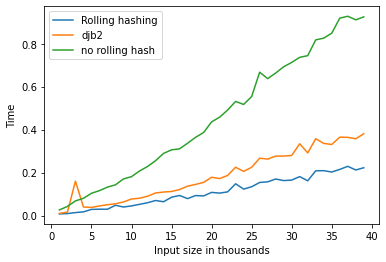

In [249]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,40)),average_rh, label = 'Rolling hashing')
plt.plot(list(range(1,40)),average_djb2, label = 'djb2')
plt.plot(list(range(1,40)),average_nohash, label = 'no rolling hash')
plt.xlabel("Input size in thousands")
plt.ylabel("Time")
plt.legend()
plt.show()

I used a Shakespeare's writing as a input for a simulator to experimentally analyze and compare the time complexity of the two algorithmic versions: rolling hashing and djb2 hash functions. I also added no rolling hashing approach where it calculates the hash value without rolling hashing. The input is randomized: I used random.randint to get a random starting and ending point of the string for both x and y strings, so that none of the approaches will have a consistant advantage over the other. I got average time of 10 simulations per each input size, and increased the input size upto 40,000 letters. The result in graph above shows that rolling hashing has the best time complexity. It had much better time complexity than the one without rolling hashing, and slightly better performance than djb2 hash function. Before optimizing q value for rolling hashing function as the smallest prime number greater than (input size*1.2), djb2 had a slightly lower time complexity. 
Both djb2 and rolling hashing both have the worst-case time compelexity of O(n) and average case of O(1). Insert function has a time complexity of O(1) all the time since it implements chaining where it inserts to the head of a linked list when collision happens. This, however, can create a worst case in search where it might require the algorithm to search the tails of each linked list, which would take O(n), going through all the substring or nodes. In general, hash table makes palgiarism detection very efficient by allowing a search common substings using hash values, and minimizing collisions is a key to keep the time complexity of the algorithm as optimally efficient. 

## Question 5
List all the LOs and HCs you have exercised while working on this final assignment as well as a thorough
justification of their application. Review your previous assignments and in-class grades, and reflect on your
application of these LOS has evolved over time

#AlgorithmicStrategies: I used a randomization technique to generate randomized inputs for simulations that test the time complexity of different algorithmic versions. I explained how the randomization technique was neccessary to create an accurate comparisons of complexity analysis. Also, I thoroughly explained the algorithmic strategies to efficiently impletement hash table to detect common substrings, including chaining and hash functions that increases efficiency.
#DataStructures: I effectively applied hash tables to create a plariarims detector that finds a common substring in a average time complexity of O(1). I thoroughly explained how the algorithm works with the hash table, and why the data structure is appropriate to solve the given problem efficiently. Also, I applied linked list when collision occurs in the hash table, and explained how the linked list works to store and be used to find the substring. 
#ComplexityAnalysis: I analyzed and compared the time complexity of different hash function I implemented using appropriate asymptotic notation, I provided and graph to illustrate the time complexities, and thoroughly interpreted the experimental results.
#PythonProgramming: I wrote a complete plagiarism detector that utilizes hash tables to effectively find common substrings. I tested the algorithm using different inputs and possible edge cases.  
#optimization: optimized the q and m values using experimentation to minimize collision.
#evidencebased: I supported my explanation and analysis with relevant graphs and test results.